In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from statistics import mode
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("training1.csv")
df1

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.445820,1.00770,0.16655,0.000000,0.085480,0.00000,0.000,1.225900,1.65000,...,0.032443,0.037986,0.029998,0.008660,0.034269,0.010365,0.011738,0.030153,1.0,0.66
1,0.000000,0.000000,0.00000,0.26019,1.234300,0.000000,0.00000,0.000,0.000000,0.25666,...,0.030867,0.050679,0.021178,0.016048,0.047683,0.058814,0.014283,0.021649,0.0,1.00
2,0.943630,0.000000,0.00000,0.14180,0.070290,0.000000,0.00000,0.000,0.390320,0.00000,...,0.010313,0.031747,0.036008,0.004851,0.033030,0.020830,0.034741,0.050037,0.0,1.00
3,0.019543,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000,0.000000,0.00000,...,0.011666,0.015680,0.018619,0.005827,0.032792,0.030836,0.023793,0.022252,0.0,0.66
4,0.000000,0.000000,0.13067,0.00000,0.006485,0.207740,0.00000,0.000,0.134970,1.82980,...,0.027669,0.028282,0.004130,0.030918,0.035200,0.032241,0.009805,0.006492,0.0,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.139840,0.00000,0.00000,0.000000,0.000000,0.00000,0.000,0.000000,0.00000,...,0.011641,0.034105,0.030931,0.028016,0.037107,0.015217,0.005206,0.050524,1.0,0.66
396,0.000000,0.000000,0.00000,0.25423,0.536650,0.052813,0.00000,0.000,0.016321,0.15445,...,0.058705,0.059477,0.040081,0.039660,0.037121,0.039089,0.024199,0.039740,0.0,0.66
397,0.000000,0.000000,0.00000,0.00000,0.380670,0.000000,0.00000,0.000,0.000000,0.99250,...,0.039576,0.020201,0.019792,0.031384,0.037379,0.022508,0.010190,0.023862,0.0,0.66
398,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,1.075,0.000000,0.00000,...,0.010942,0.023830,0.033937,0.015698,0.051196,0.004867,0.005816,0.046850,1.0,0.66


In [3]:
df1.columns

Index(['CNNs', 'CNNs.1', 'CNNs.2', 'CNNs.3', 'CNNs.4', 'CNNs.5', 'CNNs.6',
       'CNNs.7', 'CNNs.8', 'CNNs.9',
       ...
       'GIST.376', 'GIST.377', 'GIST.378', 'GIST.379', 'GIST.380', 'GIST.381',
       'GIST.382', 'GIST.383', 'label', 'confidence'],
      dtype='object', length=3458)

In [4]:
df1['label'].value_counts()

label
0.0    213
1.0    187
Name: count, dtype: int64

In [5]:
df1.iloc[:,-2:]

,label,confidence
0,1.0,0.66
1,0.0,1.00
2,0.0,1.00
3,0.0,0.66
4,0.0,0.66
...,...,...
395,1.0,0.66
396,0.0,0.66
397,0.0,0.66
398,1.0,0.66


In [6]:
set(df1.isnull().sum().values)

{0}

In [7]:
df1.iloc[:,:-2]

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.374,GIST.375,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383
0,0.000000,0.445820,1.00770,0.16655,0.000000,0.085480,0.00000,0.000,1.225900,1.65000,...,0.030754,0.041512,0.032443,0.037986,0.029998,0.008660,0.034269,0.010365,0.011738,0.030153
1,0.000000,0.000000,0.00000,0.26019,1.234300,0.000000,0.00000,0.000,0.000000,0.25666,...,0.015814,0.019815,0.030867,0.050679,0.021178,0.016048,0.047683,0.058814,0.014283,0.021649
2,0.943630,0.000000,0.00000,0.14180,0.070290,0.000000,0.00000,0.000,0.390320,0.00000,...,0.031940,0.022160,0.010313,0.031747,0.036008,0.004851,0.033030,0.020830,0.034741,0.050037
3,0.019543,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000,0.000000,0.00000,...,0.015834,0.030633,0.011666,0.015680,0.018619,0.005827,0.032792,0.030836,0.023793,0.022252
4,0.000000,0.000000,0.13067,0.00000,0.006485,0.207740,0.00000,0.000,0.134970,1.82980,...,0.037997,0.007409,0.027669,0.028282,0.004130,0.030918,0.035200,0.032241,0.009805,0.006492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.139840,0.00000,0.00000,0.000000,0.000000,0.00000,0.000,0.000000,0.00000,...,0.028802,0.027278,0.011641,0.034105,0.030931,0.028016,0.037107,0.015217,0.005206,0.050524
396,0.000000,0.000000,0.00000,0.25423,0.536650,0.052813,0.00000,0.000,0.016321,0.15445,...,0.029782,0.034993,0.058705,0.059477,0.040081,0.039660,0.037121,0.039089,0.024199,0.039740
397,0.000000,0.000000,0.00000,0.00000,0.380670,0.000000,0.00000,0.000,0.000000,0.99250,...,0.026287,0.003462,0.039576,0.020201,0.019792,0.031384,0.037379,0.022508,0.010190,0.023862
398,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,1.075,0.000000,0.00000,...,0.026681,0.023454,0.010942,0.023830,0.033937,0.015698,0.051196,0.004867,0.005816,0.046850


In [8]:
df2=pd.read_csv("training2.csv")
df2

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.0,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.33607,1.588400,...,0.036742,0.012381,NaN,0.053308,0.026501,0.005391,0.001272,0.001446,0.0,0.66
1,0.000000,0.0,0.00000,0.000000,0.00000,NaN,0.00000,0.00000,0.00000,2.255400,...,0.043143,0.019345,0.016736,0.008209,0.023059,NaN,NaN,0.022575,0.0,0.66
2,0.000000,NaN,0.00000,0.080498,NaN,0.00000,0.00000,NaN,0.00000,0.000000,...,0.039189,0.027310,0.038010,0.003747,0.016547,NaN,0.017964,0.034397,1.0,1.00
3,0.000000,0.0,0.39567,0.000000,0.00000,0.00000,0.00000,NaN,0.00000,0.000000,...,0.020592,0.044585,0.032217,0.054913,0.035068,0.021064,0.020542,0.033792,1.0,1.00
4,NaN,NaN,NaN,0.037334,0.00000,0.90437,1.17000,0.40552,0.00000,0.212560,...,0.003779,0.006411,NaN,0.003991,0.012906,0.008374,0.002190,0.042025,1.0,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,NaN,0.12083,0.493970,NaN,0.00000,0.00000,0.00000,0.00000,NaN,...,0.008865,0.027050,0.027571,0.022909,0.033778,0.003859,0.003978,0.038523,0.0,0.66
2746,0.098692,0.0,1.14190,0.821120,0.83365,0.00000,0.31507,0.00000,1.02660,0.083007,...,0.042222,0.042643,0.039760,0.029942,0.023028,0.013646,0.009340,0.048776,1.0,0.66
2747,0.000000,0.0,0.00000,2.590700,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.015427,NaN,0.021563,0.028100,0.032747,NaN,0.012894,0.026136,1.0,0.66
2748,0.549600,0.0,NaN,0.000000,0.00000,NaN,1.23020,1.09890,0.00000,0.026666,...,0.002101,0.056895,0.033361,0.007273,NaN,NaN,NaN,0.042235,1.0,1.00


In [9]:
## Splitting the dataframe into 2 dataframes so that CNN features and GIST featurtes can be imputed difefrently accordingly

In [10]:
df2_cnn=df2.iloc[:,:3072]
df2_gist=df2.iloc[:,3072:-2]
df2_labels=df2.iloc[:,-2:]


In [11]:
df2_cnn

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,CNNs.3062,CNNs.3063,CNNs.3064,CNNs.3065,CNNs.3066,CNNs.3067,CNNs.3068,CNNs.3069,CNNs.3070,CNNs.3071
0,0.000000,0.0,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.33607,1.588400,...,0.00000,NaN,0.000000,0.00000,0.00000,0.000000,0.000000,1.30750,0.41131,0.00000
1,0.000000,0.0,0.00000,0.000000,0.00000,NaN,0.00000,0.00000,0.00000,2.255400,...,0.00000,0.000000,NaN,0.00000,0.00000,0.523580,0.000000,0.33080,0.00000,0.00000
2,0.000000,NaN,0.00000,0.080498,NaN,0.00000,0.00000,NaN,0.00000,0.000000,...,0.00000,NaN,0.000000,NaN,1.80140,0.000000,0.184880,0.99247,0.00000,0.00000
3,0.000000,0.0,0.39567,0.000000,0.00000,0.00000,0.00000,NaN,0.00000,0.000000,...,0.49147,0.000000,1.102500,0.76338,0.00000,NaN,0.000000,0.00000,0.00000,0.00000
4,NaN,NaN,NaN,0.037334,0.00000,0.90437,1.17000,0.40552,0.00000,0.212560,...,0.00000,0.000000,0.000000,NaN,NaN,0.304140,0.249960,0.00000,1.11260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,NaN,0.12083,0.493970,NaN,0.00000,0.00000,0.00000,0.00000,NaN,...,NaN,0.009762,0.052281,0.00000,0.00000,0.000000,0.000000,NaN,0.00000,0.00000
2746,0.098692,0.0,1.14190,0.821120,0.83365,0.00000,0.31507,0.00000,1.02660,0.083007,...,0.00000,0.000000,0.068887,NaN,0.00000,0.017237,0.000000,0.16659,NaN,0.85018
2747,0.000000,0.0,0.00000,2.590700,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.38582,0.000000,0.000000,0.00000,1.68780,NaN,0.414850,0.00000,0.00000,0.00000
2748,0.549600,0.0,NaN,0.000000,0.00000,NaN,1.23020,1.09890,0.00000,0.026666,...,NaN,0.000000,NaN,0.00000,0.31271,0.272660,0.623160,0.00000,0.33232,0.00000


In [12]:
df2_gist

,GIST,GIST.1,GIST.2,GIST.3,GIST.4,GIST.5,GIST.6,GIST.7,GIST.8,GIST.9,...,GIST.374,GIST.375,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383
0,0.016265,NaN,0.001430,0.041718,0.003476,0.017142,NaN,NaN,0.005336,0.007241,...,0.007640,NaN,0.036742,0.012381,NaN,0.053308,0.026501,0.005391,0.001272,0.001446
1,0.012948,0.026028,0.004586,0.045909,0.019803,NaN,0.009318,0.016345,0.022464,0.072051,...,0.040871,0.020330,0.043143,0.019345,0.016736,0.008209,0.023059,NaN,NaN,0.022575
2,0.054798,0.040541,0.028166,0.049056,NaN,0.051623,0.023276,0.027843,0.033263,0.040112,...,0.035165,0.027588,0.039189,0.027310,0.038010,0.003747,0.016547,NaN,0.017964,0.034397
3,NaN,0.040860,NaN,0.028527,0.036634,0.042374,0.026994,NaN,0.022641,NaN,...,0.049510,0.027773,0.020592,0.044585,0.032217,0.054913,0.035068,0.021064,0.020542,0.033792
4,0.007711,NaN,0.002845,0.035821,0.005590,0.006080,0.008861,0.002636,0.013653,0.003287,...,0.003357,0.021205,0.003779,0.006411,NaN,0.003991,0.012906,0.008374,0.002190,0.042025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,NaN,0.051623,0.002341,0.059316,0.043091,0.010035,0.026302,0.025503,NaN,0.013827,...,NaN,NaN,0.008865,0.027050,0.027571,0.022909,0.033778,0.003859,0.003978,0.038523
2746,0.042698,0.019879,NaN,NaN,0.023117,0.031304,0.038491,0.015234,NaN,0.017417,...,0.030253,0.032428,0.042222,0.042643,0.039760,0.029942,0.023028,0.013646,0.009340,0.048776
2747,0.047701,0.034001,0.030565,NaN,0.023263,0.028943,0.028276,NaN,0.014122,0.035093,...,0.031710,0.021337,0.015427,NaN,0.021563,0.028100,0.032747,NaN,0.012894,0.026136
2748,0.016756,0.067551,0.027872,0.014548,0.009484,0.050812,0.023515,0.009091,0.021684,0.018237,...,NaN,0.018742,0.002101,0.056895,0.033361,0.007273,NaN,NaN,NaN,0.042235


In [13]:
df2_labels

,label,confidence
0,0.0,0.66
1,0.0,0.66
2,1.0,1.00
3,1.0,1.00
4,1.0,0.66
...,...,...
2745,0.0,0.66
2746,1.0,0.66
2747,1.0,0.66
2748,1.0,1.00


## Impute NaN values with most frequent values. For both the CNN and Gist features their respective  most frequent values will be used.

In [14]:
## For CNN Features
final_df2_cnn=[]
for row in range(len(df2_cnn)):
    nparray=np.array(df2_cnn.iloc[row,:])
    modeofrow=mode(df2_cnn.iloc[row,:])
    nparray=np.where(np.isnan(nparray),modeofrow,nparray)
    final_df2_cnn.append(nparray)
    
    
    nan_mask = np.isnan(nparray)

    # Check if any NaN value is present in the entire array
    is_nan_present = np.any(nan_mask)
    
final_df2_cnn=pd.DataFrame(final_df2_cnn,columns=df2_cnn.columns)
final_df2_cnn

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,CNNs.3062,CNNs.3063,CNNs.3064,CNNs.3065,CNNs.3066,CNNs.3067,CNNs.3068,CNNs.3069,CNNs.3070,CNNs.3071
0,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.33607,1.588400,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.30750,0.41131,0.00000
1,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,2.255400,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.523580,0.000000,0.33080,0.00000,0.00000
2,0.000000,0.0,0.00000,0.080498,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.00000,1.80140,0.000000,0.184880,0.99247,0.00000,0.00000
3,0.000000,0.0,0.39567,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.49147,0.000000,1.102500,0.76338,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000
4,0.000000,0.0,0.00000,0.037334,0.00000,0.90437,1.17000,0.40552,0.00000,0.212560,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.304140,0.249960,0.00000,1.11260,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,0.0,0.12083,0.493970,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.009762,0.052281,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000
2746,0.098692,0.0,1.14190,0.821120,0.83365,0.00000,0.31507,0.00000,1.02660,0.083007,...,0.00000,0.000000,0.068887,0.00000,0.00000,0.017237,0.000000,0.16659,0.00000,0.85018
2747,0.000000,0.0,0.00000,2.590700,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.38582,0.000000,0.000000,0.00000,1.68780,0.000000,0.414850,0.00000,0.00000,0.00000
2748,0.549600,0.0,0.00000,0.000000,0.00000,0.00000,1.23020,1.09890,0.00000,0.026666,...,0.00000,0.000000,0.000000,0.00000,0.31271,0.272660,0.623160,0.00000,0.33232,0.00000


In [15]:
np.unique(final_df2_cnn.isnull().sum().values)

array([0])

In [16]:
import math
s=set()
i=0
for val in np.array(df2_gist.iloc[0,:]):
    # print(type(val))
    if math.isnan(val)==True:
        # print(val,i)
        i+=1
    s.add(val)
i

73

In [17]:
mode(df2_gist.iloc[0,:])

0.016265

In [18]:
df2_gist['GIST'].isnull().sum()

523

In [19]:
mode(df2_gist['GIST'])
df2_gist['GIST'].fillna(modeofrow,inplace=True)
df2_gist['GIST'].isnull().sum()

/tmp/ipykernel_40/1591067508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2_gist['GIST'].fillna(modeofrow,inplace=True)
/tmp/ipykernel_40/1591067508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gist['GIST'].fillna(modeofrow,inplace=True)


0

In [20]:
for col in df2_gist.columns:
   
   
    modeofrow=mode(df2_gist[col])
    df2_gist[col].fillna(modeofrow,inplace=True)

        
        

/tmp/ipykernel_40/1435441666.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2_gist[col].fillna(modeofrow,inplace=True)
/tmp/ipykernel_40/1435441666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gist[col].fillna(modeofrow,inplace=True)


In [21]:
df2_gist.isnull().sum()

GIST        0
GIST.1      0
GIST.2      0
GIST.3      0
GIST.4      0
           ..
GIST.379    0
GIST.380    0
GIST.381    0
GIST.382    0
GIST.383    0
Length: 384, dtype: int64

In [22]:
df2_new=pd.concat([final_df2_cnn,df2_gist,df2_labels],axis=1)
df2_new

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.33607,1.588400,...,0.036742,0.012381,0.011663,0.053308,0.026501,0.005391,0.001272,0.001446,0.0,0.66
1,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,2.255400,...,0.043143,0.019345,0.016736,0.008209,0.023059,0.015309,0.010528,0.022575,0.0,0.66
2,0.000000,0.0,0.00000,0.080498,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.039189,0.027310,0.038010,0.003747,0.016547,0.015309,0.017964,0.034397,1.0,1.00
3,0.000000,0.0,0.39567,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.020592,0.044585,0.032217,0.054913,0.035068,0.021064,0.020542,0.033792,1.0,1.00
4,0.000000,0.0,0.00000,0.037334,0.00000,0.90437,1.17000,0.40552,0.00000,0.212560,...,0.003779,0.006411,0.011663,0.003991,0.012906,0.008374,0.002190,0.042025,1.0,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,0.0,0.12083,0.493970,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.008865,0.027050,0.027571,0.022909,0.033778,0.003859,0.003978,0.038523,0.0,0.66
2746,0.098692,0.0,1.14190,0.821120,0.83365,0.00000,0.31507,0.00000,1.02660,0.083007,...,0.042222,0.042643,0.039760,0.029942,0.023028,0.013646,0.009340,0.048776,1.0,0.66
2747,0.000000,0.0,0.00000,2.590700,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.015427,0.050419,0.021563,0.028100,0.032747,0.015309,0.012894,0.026136,1.0,0.66
2748,0.549600,0.0,0.00000,0.000000,0.00000,0.00000,1.23020,1.09890,0.00000,0.026666,...,0.002101,0.056895,0.033361,0.007273,0.017723,0.015309,0.010528,0.042235,1.0,1.00


In [23]:
## Normalized

df2_normalized = (df2_new - df2_new.min()) / (df2_new.max() - df2_new.min())


In [24]:
df2_normalized

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090094,0.461235,...,0.253763,0.078853,0.128822,0.348250,0.278519,0.036071,0.002045,0.010796,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654916,...,0.298776,0.127733,0.187819,0.050996,0.241325,0.138557,0.158589,0.251122,0.0,0.0
2,0.000000,0.0,0.000000,0.025975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.270971,0.183638,0.435229,0.021584,0.170955,0.138557,0.284358,0.385590,1.0,1.0
3,0.000000,0.0,0.119235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.140194,0.304888,0.367858,0.358829,0.371095,0.198026,0.327960,0.378708,1.0,1.0
4,0.000000,0.0,0.000000,0.012047,0.000000,0.251893,0.416326,0.172415,0.000000,0.061723,...,0.021960,0.036947,0.128822,0.023193,0.131610,0.066899,0.017571,0.472354,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,0.0,0.036412,0.159397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057726,0.181813,0.313827,0.147884,0.357155,0.020240,0.047797,0.432521,0.0,0.0
2746,0.055576,0.0,0.344112,0.264963,0.233091,0.000000,0.112113,0.000000,0.275213,0.024103,...,0.292299,0.291258,0.455581,0.194240,0.240990,0.121372,0.138489,0.549142,1.0,0.0
2747,0.000000,0.0,0.000000,0.835979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103873,0.345836,0.243956,0.182099,0.346014,0.138557,0.198606,0.291626,1.0,0.0
2748,0.309494,0.0,0.000000,0.000000,0.000000,0.000000,0.437747,0.467219,0.000000,0.007743,...,0.010161,0.391290,0.381162,0.044828,0.183663,0.138557,0.158589,0.474742,1.0,1.0


In [25]:
df1_normalized = (df1 - df1.min()) / (df1.max() - df1.min())


In [26]:
df1_normalized

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.134441,0.290898,0.052439,0.000000,0.027480,0.000000,0.000000,0.537558,0.634006,...,0.337514,0.335107,0.356106,0.045190,0.309591,0.097111,0.181742,0.259996,1.0,0.0
1,0.000000,0.000000,0.000000,0.081921,0.478059,0.000000,0.000000,0.000000,0.000000,0.098621,...,0.320866,0.452954,0.248476,0.089248,0.432596,0.642127,0.223691,0.185148,0.0,1.0
2,0.656164,0.000000,0.000000,0.044646,0.027224,0.000000,0.000000,0.000000,0.171155,0.000000,...,0.103742,0.277181,0.429447,0.022471,0.298230,0.214834,0.560897,0.435005,0.0,1.0
3,0.013589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.118034,0.128009,0.217248,0.028289,0.296047,0.327394,0.380443,0.190455,0.0,0.0
4,0.000000,0.000000,0.037721,0.000000,0.002512,0.066785,0.000000,0.000000,0.059184,0.703093,...,0.287083,0.245011,0.040443,0.177931,0.318128,0.343200,0.149874,0.051746,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.042170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.117770,0.299074,0.367492,0.160624,0.335615,0.151692,0.074083,0.439291,1.0,0.0
396,0.000000,0.000000,0.000000,0.080045,0.207851,0.016978,0.000000,0.000000,0.007157,0.059347,...,0.614935,0.534638,0.479150,0.230067,0.335743,0.420235,0.387135,0.344376,0.0,0.0
397,0.000000,0.000000,0.000000,0.000000,0.147438,0.000000,0.000000,0.000000,0.000000,0.381364,...,0.412864,0.169984,0.231562,0.180710,0.338109,0.233710,0.156227,0.204626,0.0,0.0
398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308624,0.000000,0.000000,...,0.110386,0.203677,0.404174,0.087161,0.464809,0.035256,0.084123,0.406955,1.0,0.0


In [27]:
df1_normalized

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.134441,0.290898,0.052439,0.000000,0.027480,0.000000,0.000000,0.537558,0.634006,...,0.337514,0.335107,0.356106,0.045190,0.309591,0.097111,0.181742,0.259996,1.0,0.0
1,0.000000,0.000000,0.000000,0.081921,0.478059,0.000000,0.000000,0.000000,0.000000,0.098621,...,0.320866,0.452954,0.248476,0.089248,0.432596,0.642127,0.223691,0.185148,0.0,1.0
2,0.656164,0.000000,0.000000,0.044646,0.027224,0.000000,0.000000,0.000000,0.171155,0.000000,...,0.103742,0.277181,0.429447,0.022471,0.298230,0.214834,0.560897,0.435005,0.0,1.0
3,0.013589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.118034,0.128009,0.217248,0.028289,0.296047,0.327394,0.380443,0.190455,0.0,0.0
4,0.000000,0.000000,0.037721,0.000000,0.002512,0.066785,0.000000,0.000000,0.059184,0.703093,...,0.287083,0.245011,0.040443,0.177931,0.318128,0.343200,0.149874,0.051746,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.042170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.117770,0.299074,0.367492,0.160624,0.335615,0.151692,0.074083,0.439291,1.0,0.0
396,0.000000,0.000000,0.000000,0.080045,0.207851,0.016978,0.000000,0.000000,0.007157,0.059347,...,0.614935,0.534638,0.479150,0.230067,0.335743,0.420235,0.387135,0.344376,0.0,0.0
397,0.000000,0.000000,0.000000,0.000000,0.147438,0.000000,0.000000,0.000000,0.000000,0.381364,...,0.412864,0.169984,0.231562,0.180710,0.338109,0.233710,0.156227,0.204626,0.0,0.0
398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308624,0.000000,0.000000,...,0.110386,0.203677,0.404174,0.087161,0.464809,0.035256,0.084123,0.406955,1.0,0.0


In [28]:
df_new=pd.concat([df1_normalized,df2_normalized],axis=0)
df_new

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383,label,confidence
0,0.000000,0.134441,0.290898,0.052439,0.000000,0.027480,0.000000,0.000000,0.537558,0.634006,...,0.337514,0.335107,0.356106,0.045190,0.309591,0.097111,0.181742,0.259996,1.0,0.0
1,0.000000,0.000000,0.000000,0.081921,0.478059,0.000000,0.000000,0.000000,0.000000,0.098621,...,0.320866,0.452954,0.248476,0.089248,0.432596,0.642127,0.223691,0.185148,0.0,1.0
2,0.656164,0.000000,0.000000,0.044646,0.027224,0.000000,0.000000,0.000000,0.171155,0.000000,...,0.103742,0.277181,0.429447,0.022471,0.298230,0.214834,0.560897,0.435005,0.0,1.0
3,0.013589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.118034,0.128009,0.217248,0.028289,0.296047,0.327394,0.380443,0.190455,0.0,0.0
4,0.000000,0.000000,0.037721,0.000000,0.002512,0.066785,0.000000,0.000000,0.059184,0.703093,...,0.287083,0.245011,0.040443,0.177931,0.318128,0.343200,0.149874,0.051746,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,0.000000,0.036412,0.159397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057726,0.181813,0.313827,0.147884,0.357155,0.020240,0.047797,0.432521,0.0,0.0
2746,0.055576,0.000000,0.344112,0.264963,0.233091,0.000000,0.112113,0.000000,0.275213,0.024103,...,0.292299,0.291258,0.455581,0.194240,0.240990,0.121372,0.138489,0.549142,1.0,0.0
2747,0.000000,0.000000,0.000000,0.835979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103873,0.345836,0.243956,0.182099,0.346014,0.138557,0.198606,0.291626,1.0,0.0
2748,0.309494,0.000000,0.000000,0.000000,0.000000,0.000000,0.437747,0.467219,0.000000,0.007743,...,0.010161,0.391290,0.381162,0.044828,0.183663,0.138557,0.158589,0.474742,1.0,1.0


In [29]:
df_new.isnull().sum()

CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.381      0
GIST.382      0
GIST.383      0
label         0
confidence    0
Length: 3458, dtype: int64

In [30]:
X=np.array(df_new.iloc[:,:-2])
Y=np.array(df_new.loc[:,['label']])
X.shape,Y.shape

((3150, 3456), (3150, 1))

In [34]:


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer=init, input_shape=(3456,)))
    for _ in range(14):  # Adding 14 more layers
        model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
optimizers = ['adam', 'SGD']
initializers = ['glorot_uniform', 'normal']
batch_sizes = [40 ,80]
epochs_list = [50, 100]
best_accuracy = 0
best_params = {}

# Manual hyperparameter tuning
for optimizer in optimizers:
    for init in initializers:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                print(f'Training with optimizer={optimizer}, init={init}, batch_size={batch_size}, epochs={epochs}')
                model = create_model(optimizer=optimizer, init=init)
                print(model.summary())
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.33, verbose=1)
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                print(f'Validation accuracy: {accuracy}')
                print()
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'optimizer': optimizer,
                        'init': init,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print(f'Best accuracy: {best_accuracy} with parameters: {best_params}')


Training with optimizer=adam, init=glorot_uniform, batch_size=40, epochs=50
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 256)               884992    
                                                                 
 dense_481 (Dense)           (None, 128)               32896     
                                                                 
 dense_482 (Dense)           (None, 128)               16512     
                                                                 
 dense_483 (Dense)           (None, 128)               16512     
                                                                 
 dense_484 (Dense)           (None, 128)               16512     
                                                                 
 dense_485 (Dense)           (None, 128)               16512     
                                           

Epoch 1/50
43/43 [==============================] - 4s 22ms/step - loss: 0.6928 - accuracy: 0.5355 - val_loss: 0.6925 - val_accuracy: 0.5325
Epoch 2/50
43/43 [==============================] - 1s 13ms/step - loss: 0.6922 - accuracy: 0.5367 - val_loss: 0.6922 - val_accuracy: 0.5325
Epoch 3/50
43/43 [==============================] - 1s 13ms/step - loss: 0.6918 - accuracy: 0.5367 - val_loss: 0.6918 - val_accuracy: 0.5325
Epoch 4/50
43/43 [==============================] - 1s 15ms/step - loss: 0.6915 - accuracy: 0.5367 - val_loss: 0.6916 - val_accuracy: 0.5325
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 0.6912 - accuracy: 0.5367 - val_loss: 0.6914 - val_accuracy: 0.5325
Epoch 6/50
43/43 [==============================] - 1s 13ms/step - loss: 0.6910 - accuracy: 0.5367 - val_loss: 0.6912 - val_accuracy: 0.5325
Epoch 7/50
43/43 [==============================] - 1s 13ms/step - loss: 0.6908 - accuracy: 0.5367 - val_loss: 0.6912 - val_accuracy: 0.5325
Epoch 8/50
43

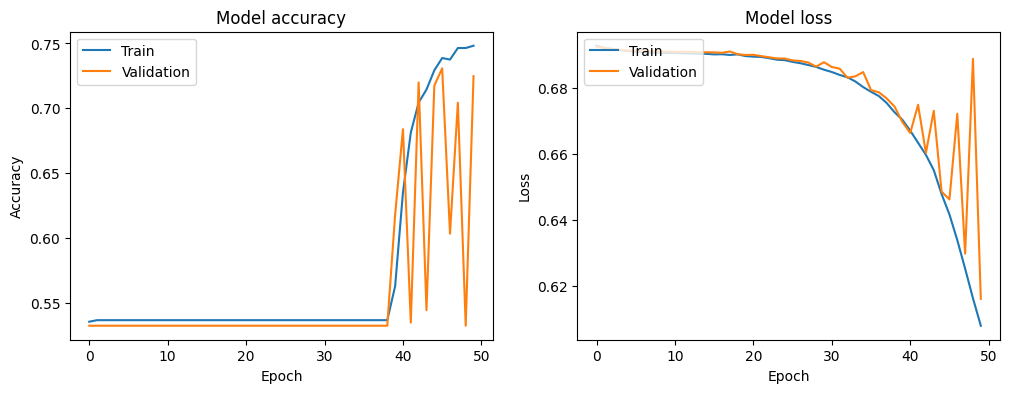

20/20 [==============================] - 0s 5ms/step - loss: 0.6149 - accuracy: 0.7206
Best Model - Loss: 0.6149426698684692, Accuracy: 0.720634937286377


In [36]:
# Re-train the best model
best_model = create_model(optimizer=best_params['optimizer'], init=best_params['init'])
history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.33)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Best Model - Loss: {loss}, Accuracy: {accuracy}')


In [37]:
# Calculate precision, recall, and f1-score
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')


20/20 [==============================] - 0s 3ms/step
Precision: 0.6568364611260054, Recall: 0.8361774744027304, F1-Score: 0.7357357357357357


In [119]:
y_pred.shape

(630, 1)

## Predicting on the test set

In [85]:
df_test=pd.read_csv('test.csv')
df_test

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.374,GIST.375,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383
0,NaN,0.2334,0.000000,NaN,0.791880,0.000000,NaN,0.00000,0.43900,0.000000,...,0.009773,NaN,0.011548,NaN,0.017014,NaN,0.020395,NaN,0.007909,0.024576
1,0.45386,0.0000,NaN,NaN,0.000000,1.177500,0.0,0.00000,0.42297,2.025100,...,0.009820,0.026096,0.039678,NaN,0.057236,0.023440,NaN,0.014737,0.013860,0.058389
2,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.319860,...,NaN,NaN,0.026954,0.050490,NaN,NaN,NaN,0.021365,0.027606,0.031131
3,0.22014,NaN,0.000000,NaN,0.881920,1.093600,NaN,0.00000,0.00000,0.000000,...,0.007899,0.023398,NaN,0.022786,NaN,0.007288,0.043885,NaN,0.011621,0.022733
4,NaN,0.0000,NaN,NaN,0.000000,0.000000,0.0,1.79380,0.00000,0.000000,...,0.012921,NaN,0.019792,0.019010,0.003771,0.003214,0.001543,NaN,0.003199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.44172,0.0000,0.000000,1.32580,0.185200,1.544700,0.0,0.00000,NaN,0.000000,...,0.027531,0.028246,0.004278,NaN,0.012703,NaN,0.017077,NaN,0.021376,0.016964
996,0.00000,NaN,NaN,NaN,0.017221,NaN,0.0,NaN,0.72694,0.399110,...,0.005851,0.018785,0.028535,0.037508,0.021416,0.000547,0.020206,0.005268,0.008311,NaN
997,0.00000,1.4189,NaN,NaN,0.000000,0.433280,0.0,0.00000,0.46587,0.872840,...,NaN,NaN,0.036006,0.045336,0.051569,0.087066,0.027203,0.020635,NaN,NaN
998,0.34373,0.0000,0.144660,0.30262,NaN,0.018162,0.0,0.91524,0.76578,0.021152,...,NaN,0.030069,0.010835,0.015817,NaN,0.008095,NaN,0.017243,0.002980,0.035659


In [86]:
df_test.isnull().sum()

CNNs        215
CNNs.1      186
CNNs.2      185
CNNs.3      225
CNNs.4      214
           ... 
GIST.379    201
GIST.380    212
GIST.381    217
GIST.382    201
GIST.383    199
Length: 3456, dtype: int64

## Applying same things as on done our training set to remove the outliers

In [87]:
df_test_cnn=df_test.iloc[:,:3072]
df_test_gist=df_test.iloc[:,3072:]

In [88]:
df_test_cnn.columns

Index(['CNNs', 'CNNs.1', 'CNNs.2', 'CNNs.3', 'CNNs.4', 'CNNs.5', 'CNNs.6',
       'CNNs.7', 'CNNs.8', 'CNNs.9',
       ...
       'CNNs.3062', 'CNNs.3063', 'CNNs.3064', 'CNNs.3065', 'CNNs.3066',
       'CNNs.3067', 'CNNs.3068', 'CNNs.3069', 'CNNs.3070', 'CNNs.3071'],
      dtype='object', length=3072)

In [89]:
df_test_gist.columns

Index(['GIST', 'GIST.1', 'GIST.2', 'GIST.3', 'GIST.4', 'GIST.5', 'GIST.6',
       'GIST.7', 'GIST.8', 'GIST.9',
       ...
       'GIST.374', 'GIST.375', 'GIST.376', 'GIST.377', 'GIST.378', 'GIST.379',
       'GIST.380', 'GIST.381', 'GIST.382', 'GIST.383'],
      dtype='object', length=384)

## Impute NaN values with most frequent values. For both the CNN and Gist features their respective  most frequent values will be used.

In [91]:
## For CNN Features
final_df_test_cnn=[]
for row in range(len(df_test_cnn)):
    nparray=np.array(df_test_cnn.iloc[row,:])
    modeofrow=mode(df_test_cnn.iloc[row,:])
    nparray=np.where(np.isnan(nparray),modeofrow,nparray)
    final_df_test_cnn.append(nparray)
    
    
    nan_mask = np.isnan(nparray)

    # Check if any NaN value is present in the entire array
    is_nan_present = np.any(nan_mask)
    
final_df_test_cnn=pd.DataFrame(final_df_test_cnn,columns=df_test_cnn.columns)
final_df_test_cnn

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,CNNs.3062,CNNs.3063,CNNs.3064,CNNs.3065,CNNs.3066,CNNs.3067,CNNs.3068,CNNs.3069,CNNs.3070,CNNs.3071
0,0.00000,0.2334,0.000000,0.00000,0.791880,0.000000,0.0,0.00000,0.43900,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.66924,0.45612,0.22030,0.00000,0.000000,0.000000
1,0.45386,0.0000,0.000000,0.00000,0.000000,1.177500,0.0,0.00000,0.42297,2.025100,...,0.00000,1.17880,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,1.899000
2,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.319860,...,0.00000,0.00000,0.00000,1.22220,4.77850,0.00000,0.00632,0.00000,0.000000,0.000000
3,0.22014,0.0000,0.000000,0.00000,0.881920,1.093600,0.0,0.00000,0.00000,0.000000,...,0.00000,0.95832,0.00000,0.00000,0.00000,0.00000,0.00000,0.41876,0.444400,0.033549
4,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.0,1.79380,0.00000,0.000000,...,0.91257,0.00000,0.70167,0.00000,0.00000,0.00000,0.00000,0.00000,0.080808,0.337520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.44172,0.0000,0.000000,1.32580,0.185200,1.544700,0.0,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.78843,0.00000,0.62514,0.00000,0.000000,0.000000
996,0.00000,0.0000,0.000000,0.00000,0.017221,0.000000,0.0,0.00000,0.72694,0.399110,...,0.00000,0.00000,0.00000,0.26456,0.00000,0.33241,0.00000,0.16293,0.000000,0.000000
997,0.00000,1.4189,0.000000,0.00000,0.000000,0.433280,0.0,0.00000,0.46587,0.872840,...,0.00000,0.00000,1.06060,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
998,0.34373,0.0000,0.144660,0.30262,0.000000,0.018162,0.0,0.91524,0.76578,0.021152,...,0.31877,0.00000,0.20055,0.69974,0.00000,0.14584,0.45222,0.00000,0.000000,0.000000


In [92]:
final_df_test_cnn.isnull().sum()

CNNs         0
CNNs.1       0
CNNs.2       0
CNNs.3       0
CNNs.4       0
            ..
CNNs.3067    0
CNNs.3068    0
CNNs.3069    0
CNNs.3070    0
CNNs.3071    0
Length: 3072, dtype: int64

In [93]:
## For GIST Features
for col in df_test_gist.columns:
    modeofrow=mode(df_test_gist[col])
    df_test_gist[col].fillna(modeofrow,inplace=True)

        
        

/tmp/ipykernel_40/372518851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_gist[col].fillna(modeofrow,inplace=True)
/tmp/ipykernel_40/372518851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_gist[col].fillna(modeofrow,inplace=True)


In [94]:
final_df_test_cnn.isnull().sum()

CNNs         0
CNNs.1       0
CNNs.2       0
CNNs.3       0
CNNs.4       0
            ..
CNNs.3067    0
CNNs.3068    0
CNNs.3069    0
CNNs.3070    0
CNNs.3071    0
Length: 3072, dtype: int64

In [95]:
df_test_gist.isnull().sum()

GIST        0
GIST.1      0
GIST.2      0
GIST.3      0
GIST.4      0
           ..
GIST.379    0
GIST.380    0
GIST.381    0
GIST.382    0
GIST.383    0
Length: 384, dtype: int64

In [96]:
df_test_new=pd.concat([final_df_test_cnn,df_test_gist],axis=1)
df_test_new

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.374,GIST.375,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383
0,0.00000,0.2334,0.000000,0.00000,0.791880,0.000000,0.0,0.00000,0.43900,0.000000,...,0.009773,0.033122,0.011548,0.021680,0.017014,0.017546,0.020395,0.014334,0.007909,0.024576
1,0.45386,0.0000,0.000000,0.00000,0.000000,1.177500,0.0,0.00000,0.42297,2.025100,...,0.009820,0.026096,0.039678,0.021680,0.057236,0.023440,0.016528,0.014737,0.013860,0.058389
2,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.319860,...,0.019197,0.033122,0.026954,0.050490,0.030574,0.017546,0.016528,0.021365,0.027606,0.031131
3,0.22014,0.0000,0.000000,0.00000,0.881920,1.093600,0.0,0.00000,0.00000,0.000000,...,0.007899,0.023398,0.020035,0.022786,0.030574,0.007288,0.043885,0.014334,0.011621,0.022733
4,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.0,1.79380,0.00000,0.000000,...,0.012921,0.033122,0.019792,0.019010,0.003771,0.003214,0.001543,0.014334,0.003199,0.029553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.44172,0.0000,0.000000,1.32580,0.185200,1.544700,0.0,0.00000,0.00000,0.000000,...,0.027531,0.028246,0.004278,0.021680,0.012703,0.017546,0.017077,0.014334,0.021376,0.016964
996,0.00000,0.0000,0.000000,0.00000,0.017221,0.000000,0.0,0.00000,0.72694,0.399110,...,0.005851,0.018785,0.028535,0.037508,0.021416,0.000547,0.020206,0.005268,0.008311,0.029553
997,0.00000,1.4189,0.000000,0.00000,0.000000,0.433280,0.0,0.00000,0.46587,0.872840,...,0.019197,0.033122,0.036006,0.045336,0.051569,0.087066,0.027203,0.020635,0.012905,0.029553
998,0.34373,0.0000,0.144660,0.30262,0.000000,0.018162,0.0,0.91524,0.76578,0.021152,...,0.019197,0.030069,0.010835,0.015817,0.030574,0.008095,0.016528,0.017243,0.002980,0.035659


In [103]:
df_test_new.columns

Index(['CNNs', 'CNNs.1', 'CNNs.2', 'CNNs.3', 'CNNs.4', 'CNNs.5', 'CNNs.6',
       'CNNs.7', 'CNNs.8', 'CNNs.9',
       ...
       'GIST.374', 'GIST.375', 'GIST.376', 'GIST.377', 'GIST.378', 'GIST.379',
       'GIST.380', 'GIST.381', 'GIST.382', 'GIST.383'],
      dtype='object', length=3456)

In [104]:
np.array(df_test_new).shape

(1000, 3456)

In [120]:
predicted_on_test=y_pred = (best_model.predict(df_test_new) > 0.5).astype("int32")
predicted_on_test

32/32 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [121]:
predicted_on_test.shape

(1000, 1)

In [122]:
predicted_test=[]
for val in predicted_on_test:
    predicted_test.append(val[0])
predicted_test

[0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [123]:
predicted_df=pd.DataFrame({'prediction':predicted_test})
predicted_df

,prediction
0,0
1,0
2,1
3,0
4,1
...,...
995,0
996,0
997,1
998,1


In [117]:
predicted_df.to_csv("predicted_df.csv",index=False)